# Regressão Linear com Zombie Health
## Altura x Peso

## Importando o arquivo CSV com o Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/zombie/raw/zombies-survey.csv')
df.head(10)

name        type gender  height  weight  gbc  gs  pbc   sp
0       Lossack Slossir  biological   male    1.88  109.72  0.8  14  5.1  3.5
1            Hasp Talch  biological   male    1.75   73.62  0.8  14  4.9  3.0
2      Lesprash Rindrad  biological   male    1.88   96.50  0.8  13  4.7  3.2
3          Halceff Gock  biological   male    1.82   99.81  0.8  15  4.6  3.1
4       Moddeche Splud   biological   male    1.77   93.60  0.8  14  5.0  3.6
5        Oshor Geactong  biological   male    1.71   69.04  1.6  17  5.4  3.9
6  Glitcolch Threbbalgo  biological   male    1.75   83.43  1.2  14  4.6  3.4
7          Giemmedd Ark  biological   male    1.74   76.19  0.8  15  5.0  3.4
8            Nesp Natho  biological   male    1.70   79.80  0.8  14  4.4  2.9
9        Mapmo Ondrath   biological   male    1.61   70.94  0.4  15  4.9  3.1

## Scatter plot da Altura x Peso de Recuperação

<AxesSubplot:xlabel='height', ylabel='weight'>

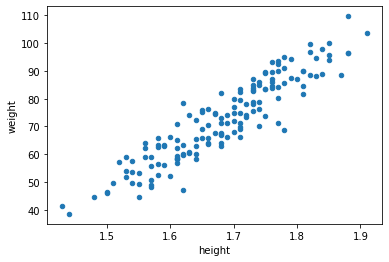

In [2]:
df.plot.scatter(x='height', y='weight')

## Estimando a Regressão Linear usando Least Squares  (via SciPy)

In [3]:
from scipy import stats
x = df['height']
y = df['weight']
a, b, r, p, std_err = stats.linregress(x, y)

## Plotando a função linear estimada x dados da amostra

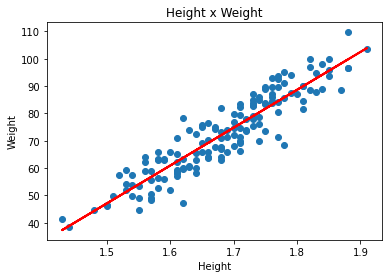

In [4]:
def estimate_y(x):
  return a * x + b

df['y_estimated'] = df['height'].apply(estimate_y)

plt.figure()
plt.plot(df['height'], df['weight'], 'o')
plt.plot(df['height'], df['y_estimated'], 'r', linewidth=2)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height x Weight')
plt.show()

## Intercept, Height e R2

In [5]:
print("Intercept: %f" % a)
print("Height: %f" % b)
print("R-squared: %f" % r**2)

Intercept: 138.630118
Height: -160.886089
R-squared: 0.851199


## Estimando a Regressão Linear usando Ordinary Least Squares (OLS) - via Statsmodels

In [7]:
from statsmodels.formula.api import ols

model = ols("weight ~ height", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     846.6
Date:                Tue, 11 May 2021   Prob (F-statistic):           4.20e-63
Time:                        16:09:28   Log-Likelihood:                -475.68
No. Observations:                 150   AIC:                             955.4
Df Residuals:                     148   BIC:                             961.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -160.8861      8.033    -20.029      0.000    -176.760    -145.013
height       138.6301      4.764     29.097      0.000     129.215     148.045
==============================================================================
Omnibus:                        1.125   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                1.195
Skew:                          -0.199   Prob(JB):                        0.550
Kurtosis:                       2.820   Cond. No.                         38.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""